In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import easyocr
import pandas as pd
import cv2
import numpy as np

In [ ]:
reader = easyocr.Reader(["en"],gpu=False)

folder_path = './test_images'

csv_path = './val.csv'
labels_df = pd.read_csv(csv_path)

In [ ]:
ground_truths = dict(zip(labels_df['image_name'], labels_df['label']))

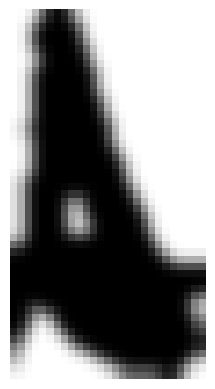

Evaluation for test1.png:
Extracted Text: 
Ground Truth: A
Correct: False


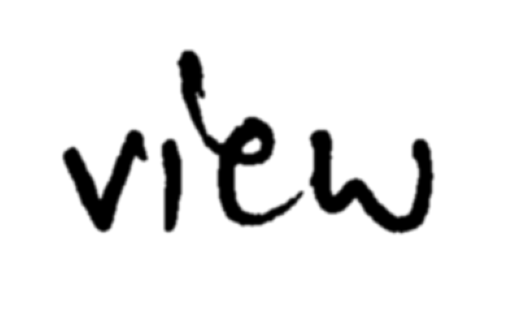

Evaluation for test10.png:
Extracted Text: vibw
Ground Truth: view
Correct: False


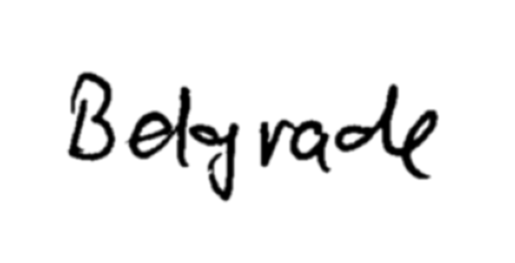

Evaluation for test11.png:
Extracted Text: vaole Beld"
Ground Truth: Belgrade
Correct: False


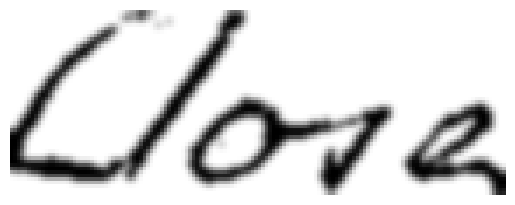

Evaluation for test12.png:
Extracted Text: Lloxe
Ground Truth: Close
Correct: False


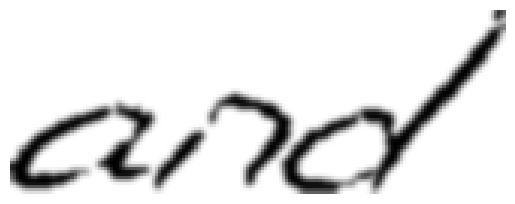

Evaluation for test13.png:
Extracted Text: CinIcY
Ground Truth: and
Correct: False


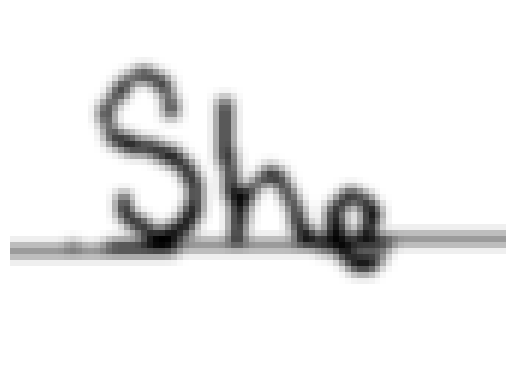

Evaluation for test14.png:
Extracted Text: She
Ground Truth: She
Correct: True


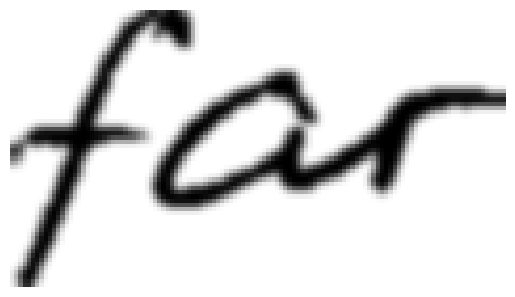

Evaluation for test15.png:
Extracted Text: far
Ground Truth: far
Correct: True


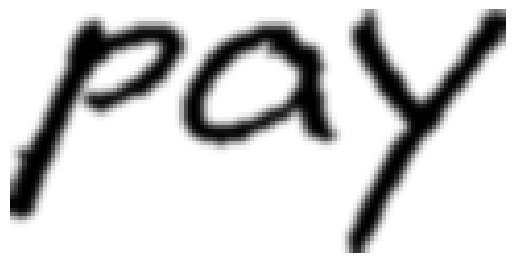

Evaluation for test16.png:
Extracted Text: pay
Ground Truth: pay
Correct: True


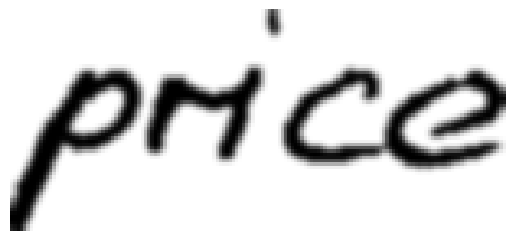

Evaluation for test17.png:
Extracted Text: price
Ground Truth: price
Correct: True


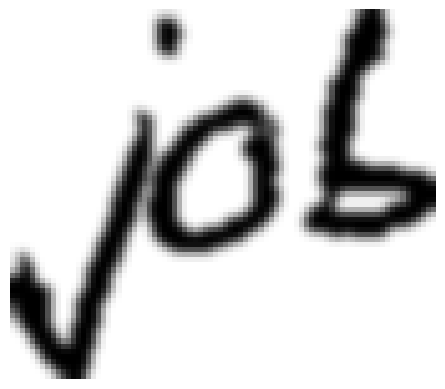

Evaluation for test18.png:
Extracted Text: jol
Ground Truth: job
Correct: False


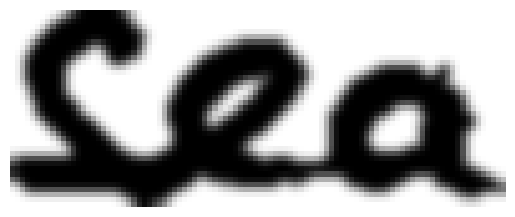

Evaluation for test19.png:
Extracted Text: Sea
Ground Truth: sea
Correct: False


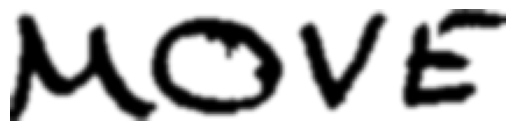

Evaluation for test2.png:
Extracted Text: MOVE
Ground Truth: MOVE
Correct: True


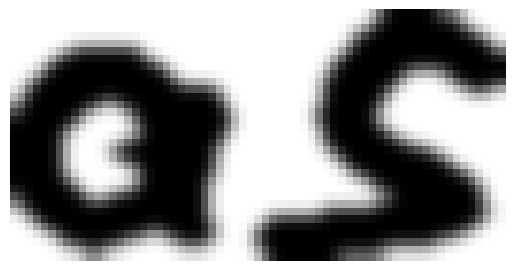

Evaluation for test20.png:
Extracted Text: aS
Ground Truth: as
Correct: False


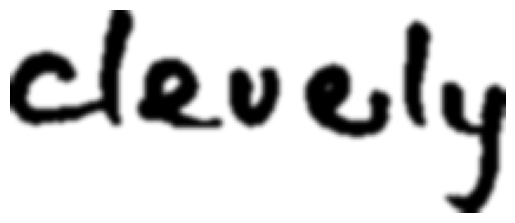

Evaluation for test21.png:
Extracted Text: Oevoly
Ground Truth: cleverly
Correct: False


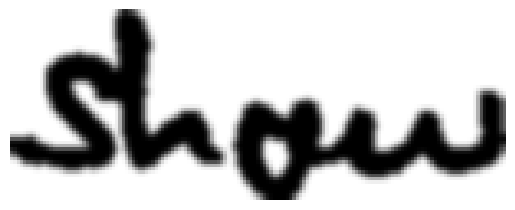

Evaluation for test22.png:
Extracted Text: Slolu
Ground Truth: show
Correct: False


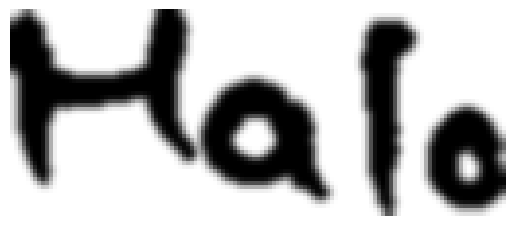

Evaluation for test23.png:
Extracted Text: Halo
Ground Truth: Malo
Correct: False


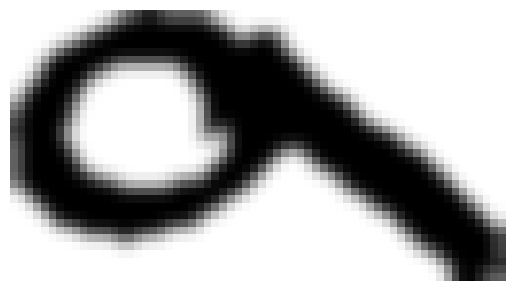

Evaluation for test3.png:
Extracted Text: 
Ground Truth: a
Correct: False


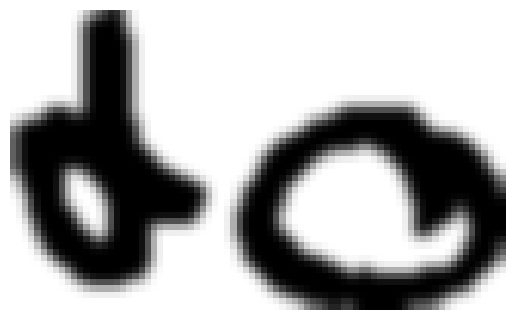

Evaluation for test4.png:
Extracted Text: 80
Ground Truth: do
Correct: False


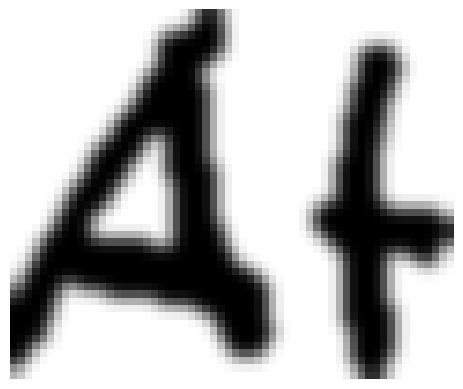

Evaluation for test5.png:
Extracted Text: Al
Ground Truth: At
Correct: False


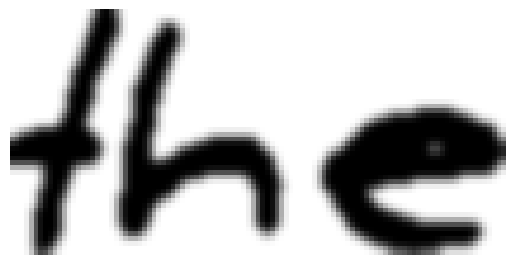

Evaluation for test6.png:
Extracted Text: the
Ground Truth: the
Correct: True


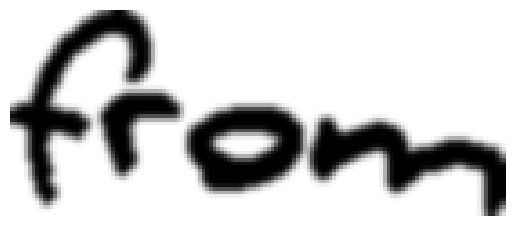

Evaluation for test7.png:
Extracted Text: fron
Ground Truth: from
Correct: False


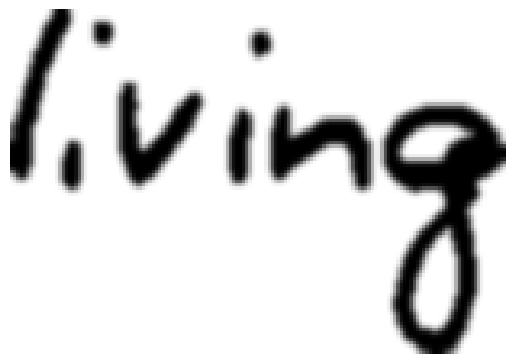

Evaluation for test8.png:
Extracted Text: Lvina
Ground Truth: living
Correct: False


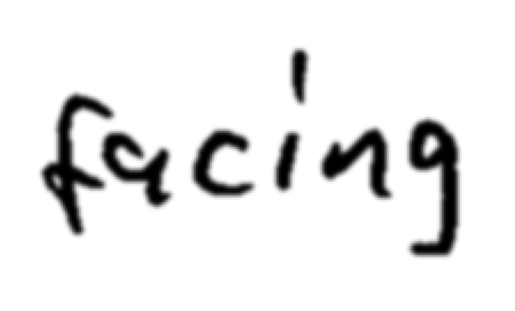

Evaluation for test9.png:
Extracted Text: fxcim]
Ground Truth: facing
Correct: False
Overall Accuracy: 0.2609


In [42]:
# Klasördeki tüm dosyaların isimlerini listeleyin
files = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]
correct = 0
total = 0
# Dosyaları loopla tek tek alma
def preprocess_image(image_path):
    # Resmi OpenCV ile oku
    img = cv2.imread(image_path)

    #siyah beyaz yapma
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Kontrastı artırmak için
    enhancer = ImageEnhance.Contrast(Image.fromarray(gray_img))
    enhanced_img = np.array(enhancer.enhance(2))  #çarpılarak artıyor kontrast

    # Threshold
    _, threshold_img = cv2.threshold(enhanced_img, 120, 255, cv2.THRESH_BINARY)

    # Gaussian Blur
    blurred_img = cv2.GaussianBlur(threshold_img, (5, 5), 0)

    return blurred_img


for file in files:
    image_path = os.path.join(folder_path, file)

    # Görüntüye preprocessing uygulama
    preprocessed_image = preprocess_image(image_path)

    # Preprocessed resmi gösterin
    plt.imshow(preprocessed_image, cmap='gray')
    plt.axis('off')  # Ekseni gizle
    plt.show()

    # EasyOCR ile metni çıkartın
    result = reader.readtext(preprocessed_image)
    extracted_text = " ".join([text[1] for text in result]) if result else ""  # Metinleri birleştir, eğer sonuç yoksa boş bir metin

    # Gerçek metni almak için ground_truths sözlüğünden doğru etiketi alın
    ground_truth = ground_truths.get(file, "")

    # Eğer OCR tarafından çıkarılan metin boşsa, bunu yanlış kabul edelim
    if not extracted_text:
        is_correct = False  # OCR sonucu boşsa yanlış kabul edelim
    else:
        is_correct = (extracted_text.strip() == ground_truth.strip())  # Eğer çıkarılan metin doğru ise doğru kabul et

    # Toplam ve doğru sayıları güncelle
    total += 1
    if is_correct:
        correct += 1

    # Değerlendirme (evaluation) metriklerini hesaplayın
    print(f"Evaluation for {file}:")
    print(f"Extracted Text: {extracted_text}")
    print(f"Ground Truth: {ground_truth}")
    print(f"Correct: {is_correct}")
    print("====================================")

# Accuracy hesaplama
accuracy = correct / total if total > 0 else 0
print(f"Overall Accuracy: {accuracy:.4f}")